In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import seaborn
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import scipy.stats as stats
import plotly.io as pio
from plotly.tools import FigureFactory as FF
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
plotly.tools.set_credentials_file(username='ThisIsDNa', api_key='DUwIm8Ia6mwSF2mqa9GC')

In [72]:
file_2016 = "../Desktop/2016_state_debt_revenue.csv"
df_2016 = pd.read_csv(file_2016)
df_2016.drop(['General revenue', 'Intergovernmental revenue', 'Taxes', 'General sales',
         'Selective sales', 'License taxes', 'Individual income tax', 'Corporate income tax',
         'Natural resources', 'Parks and recreation', 'Interest on general debt',
         'Other and unallocable', 'Utility expenditure', 'Liquor stores expenditure', 
         'Insurance trust expenditure', 'Cash and security holdings', 'Other taxes',
         'Current charge', 'Miscellaneous general revenue', 'Utility revenue', 'Liquor stores revenue',
         'Insurance trust revenue', 'Total expenditure', 'Intergovernmental expenditure',
         'General expenditure','Education','Public welfare', 'Hospitals', 'Health', 'Highways', 
         'Police protection', 'Correction', 'Governmental administration', 'Direct expenditure',
         'Current operation', 'Capital outlay', 'Insurance benefits and repayments', 'Assistance and subsidies',
         'Interest on debt', 'Exhibit: Salaries and wages', 'Total expenditure.1', 'Intergovernmental expenditure.1',
         'Direct expenditure.1', 'General expenditure, by function:', 'Unnamed: 2', 'Unnamed: 12', 'Unnamed: 15', 
         'Unnamed: 19', 'Unnamed: 29', 'Unnamed: 34', 'Unnamed: 41', 'Unnamed: 47', 'Unnamed: 50', 'Unnamed: 54', 
         'Unnamed: 56', '(Thousands of Dollars)'
        ], axis=1, inplace=True)

df_2016.rename(index=str, columns={'Total revenue': 'Revenue 2016',
                              'Debt at end of fiscal year': 'Debt 2016'}, inplace=True)

df_2016.to_csv('2016_state_debt_revenue_alter.csv', sep=',', encoding='utf-8')
file_2016 = "../Desktop/2016_state_debt_revenue_alter.csv"
df_2016 = pd.read_csv(file_2016)
#df_2016.head()

In [73]:
file_2015 = "../Desktop/2015_state_debt_revenue.csv"
df_2015 = pd.read_csv(file_2015)
df_2015.drop(['General revenue', 'Intergovernmental revenue', 'Taxes', 'General sales',
         'Selective sales', 'License taxes', 'Individual income tax', 'Corporate income tax',
         'Natural resources', 'Parks and recreation', 'Interest on general debt',
         'Other and unallocable', 'Utility expenditure', 'Liquor stores expenditure', 
         'Insurance trust expenditure', 'Cash and security holdings', 'Other taxes',
         'Current charge', 'Miscellaneous general revenue', 'Utility revenue', 'Liquor stores revenue',
         'Insurance trust revenue', 'Total expenditure', 'Intergovernmental expenditure',
         'General expenditure','Education','Public welfare', 'Hospitals', 'Health', 'Highways', 
         'Police protection', 'Correction', 'Governmental administration', 'Direct expenditure',
         'Current operation', 'Capital outlay', 'Insurance benefits and repayments', 'Assistance and subsidies',
         'Interest on debt', 'Exhibit: Salaries and wages', 'Total expenditure.1', 'Intergovernmental expenditure.1',
         'Direct expenditure.1', 'General expenditure, by function:', 'Unnamed: 2', 'Unnamed: 12', 'Unnamed: 15', 
         'Unnamed: 19', 'Unnamed: 29', 'Unnamed: 34', 'Unnamed: 41', 'Unnamed: 47', 'Unnamed: 50', 'Unnamed: 54', 
         'Unnamed: 56'
        ], axis=1, inplace=True)
df_2015.rename(index=str, columns={'(Thousands of Dollars)': 'State',
                              'Total revenue': 'Revenue 2015',
                              'Debt at end of fiscal year': 'Debt 2015'}, inplace=True)

new_col = ['', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
           'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
           'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
           'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
           'WA', 'WV', 'WI', 'WY']

df_2015.insert(0, 'code', new_col)
df_2015.to_csv('2015_state_debt_revenue_alter.csv', sep=',', encoding='utf-8')
file_2015 = "../Desktop/2015_state_debt_revenue_alter.csv"
df_2015 = pd.read_csv(file_2015)
#df_2015.head()

In [74]:
df = pd.merge(df_2015, df_2016)
df.head()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.to_csv('2015_2016_state_debt_revenue.csv', sep=',', encoding='utf-8')
file = "../Desktop/2015_2016_state_debt_revenue.csv"

#Translate Thousands into Ones
df.loc[:,'Revenue 2015']*= 1000
df.loc[:,'Debt 2015'] *= 1000
df.loc[:,'Revenue 2016'] *= 1000
df.loc[:,'Debt 2016'] *= 1000

#Translate Ones into Billions
df.loc[:,'Revenue 2015']/= 1000000000
df.loc[:,'Debt 2015'] /= 1000000000
df.loc[:,'Revenue 2016'] /= 1000000000
df.loc[:,'Debt 2016'] /= 1000000000

df = df.iloc[1:]
#df.head()

In [75]:
for col in df.columns:
        df[col] = df[col].astype(str)
        
df['text'] = df['State'] + '<br>' +\
    ' 2015 Debt ' + df['Debt 2015'] +\
    ' 2016 Debt ' + df['Debt 2016']

data = [ dict(
                type='choropleth',
                colorscale = 'Reds',
                reversescale = True,
                autocolorscale = False,
                locations = df['code'],
                z = df['Debt 2015'].astype(float),
                locationmode = 'USA-states',
                text = df['text'],
                marker = dict(
                        line = dict (
                        color = 'rgb(255,255,255)',
                        width = 2) ),
                colorbar = dict(
                title = 'Billions USD'
                )
                )]

layout = dict(
        title = '2015 US Debt by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )


fig = dict( data=data, layout=layout )
py.iplot( data, filename='d3-cloropleth-map' )
pio.write_image(fig, 'Images/2015_US_State_Debt.png')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ThisIsDNa/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [76]:
states = []
revenue_2015 = []
revenue_2016 = []
debt_2015 = []
debt_2016 = []

with open(file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    next(csvreader)
    for row in csvreader:
        states.append(row[2])
        revenue_2015.append(row[3])
        debt_2015.append(row[4])
        revenue_2016.append(row[5])
        debt_2016.append(row[6])

In [77]:
#Grab Mean of Debt 2015 and Debt 2016

float_debt_2015 = list(map(float, debt_2015))
float_debt_2016 = list(map(float, debt_2016))
float_revenue_2015 = list(map(float, revenue_2015))
float_revenue_2016 = list(map(float, revenue_2016))

mean_debt_2015 = np.mean(float_debt_2015)
mean_debt_2016 = np.mean(float_debt_2016)
mean_revenue_2015 = list(map(float, float_revenue_2015))
mean_revenue_2016 = list(map(float, float_revenue_2016))

In [78]:
twosample_results = stats.ttest_ind(float_debt_2015, float_debt_2016, equal_var=False)
matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = plotly.figure_factory.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, filename='twosample-table')

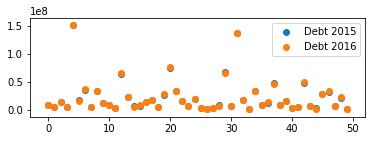

In [79]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(float_debt_2015)), float_debt_2015, label="Debt 2015")
plt.scatter(range(len(float_debt_2016)), float_debt_2016, label="Debt 2016")
plt.legend()

In [80]:
twosample_results_debt_v_revenue = stats.ttest_ind(float_debt_2015, float_revenue_2015, equal_var=False)
matrix_twosample_debt_v_revenue = [
    ['Debt 2015 v Debt 2016', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results_debt_v_revenue[0], twosample_results_debt_v_revenue[1]]
]

twosample_table_debt_v_revenue = plotly.figure_factory.create_table(matrix_twosample_debt_v_revenue, index=True)
py.iplot(twosample_table_debt_v_revenue, filename='twosample-table_debt_v_revenue')

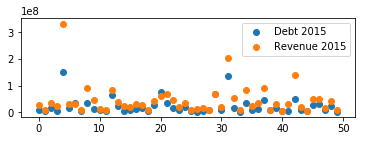

In [81]:
plt.subplot(2, 1, 1)
plt.scatter(range(len(float_debt_2015)), float_debt_2015, label="Debt 2015")
plt.scatter(range(len(float_revenue_2015)), float_revenue_2015, label="Revenue 2015")
plt.legend()